In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('Loan_default.csv')
dataset.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [4]:
df = dataset.drop(['LoanID'], axis = 1)

<Axes: >

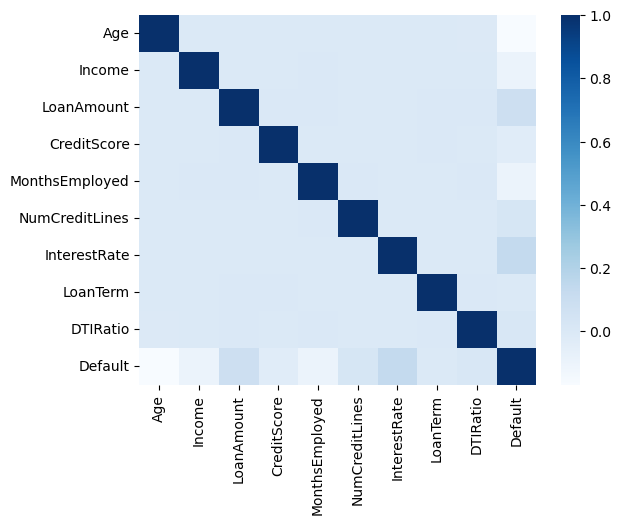

In [5]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only = True), cmap="Blues")

In [6]:
def FeatureEncoder(data):
    data = pd.get_dummies(data, columns = ['Education'], prefix = 'Education_', prefix_sep = '', dtype=int)
    data = pd.get_dummies(data, columns = ['EmploymentType'], prefix = 'EMP_', prefix_sep = '', dtype=int)
    data = pd.get_dummies(data, columns = ['MaritalStatus'], prefix = 'Marital_', prefix_sep = '', dtype=int)
    data = pd.get_dummies(data, columns = ['HasMortgage'], prefix = 'Mortgage_', prefix_sep = '', dtype=int)
    data = pd.get_dummies(data, columns = ['HasDependents'], prefix = 'Dependents_', prefix_sep = '', dtype=int)
    data = pd.get_dummies(data, columns = ['LoanPurpose'], prefix = 'Purpose_', prefix_sep = '', dtype=int)
    data = pd.get_dummies(data, columns = ['HasCoSigner'], prefix = 'CoSigner_', prefix_sep = '', dtype=int)
    return data
    

In [7]:
df['Education'].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
for train_indices, test_indices in split.split(df, df[['Default', 'Education', 'EmploymentType', 'MaritalStatus','HasMortgage','HasDependents','LoanPurpose', 'HasCoSigner']]):
    strat_train_set = df.loc[train_indices]
    strat_test_set = df.loc[test_indices]



In [10]:
strat_train_set['Default'].value_counts()

Default
0    180546
1     23731
Name: count, dtype: int64

In [ ]:
strat_train_set